In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
!git clone https://github.com/yhlee1627/deeplearning.git

Cloning into 'deeplearning'...


In [3]:
dataframe = read_csv('deeplearning/corona_daily.csv', usecols=[3], skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

C:\Users\Supervisor\AppData\Local\Temp\ipykernel_6816\1228063293.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dataframe = read_csv('deeplearning/corona_daily.csv', usecols=[3], skipfooter=3)


     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [7]:
train_data.shape

(89, 1)

In [11]:
def create_dataset(dataset, look_back):
    x_data =[]  # [(1,2,3),(2,3,4),(3,4,5),...]
    y_data =[]  # [(4),(5),(6),...]
    for i in range(len(dataset)-look_back-1): 
        data = dataset[i:(i+look_back), 0]       # range(0,4) range(1,5)
        x_data.append(data)      
        y_data.append(dataset[i + look_back, 0])  #data[4]  data[5]
    return np.array(x_data), np.array(y_data)

In [12]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [13]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [33]:
from tensorflow.keras.metrics import MSE,R2Score
model = Sequential()
model.add(Input(shape=(1, look_back)))
model.add(SimpleRNN(3))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='adam',metrics=[MSE,R2Score])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7921 - mean_squared_error: 0.7921 - r2_score: -6.6795
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1934 - mean_squared_error: 0.1934 - r2_score: -1.5215
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0657 - mean_squared_error: 0.0657 - r2_score: 0.4947  
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - r2_score: 0.7082          
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - r2_score: 0.7772  
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - r2_score: 0.8399 
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - r2_score: 0.8766
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - r2_score: 0.9174  
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - m

In [17]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [26]:
TestPredict.shape

(19, 1)

In [23]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 117.32 RMSE
Test Score: 75.68 RMSE


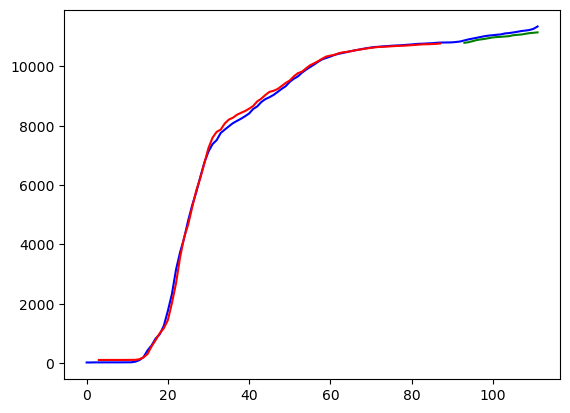

In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict
plt.plot(dataset,'b')
plt.plot(trainPredictPlot, 'r')
plt.plot(testPredictPlot,'g')
plt.show()